<a href="https://colab.research.google.com/github/uzmasid112/BISI-CST2101-F23-Project/blob/main/Revenue_Data_and_Building_a_Dashboard_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


<h1>Extracting and Visualizing Stock Data</h1>
<h2>Description</h2>


Extracting essential data from a dataset and displaying it is a necessary part of data science; therefore individuals can make correct decisions based on the data. In this assignment, you will extract some stock data, you will then display this data in a graph.


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Define a Function that Makes a Graph</li>
        <li>Question 1: Use yfinance to Extract Stock Data</li>
        <li>Question 2: Use Webscraping to Extract Tesla Revenue Data</li>
        <li>Question 3: Use yfinance to Extract Stock Data</li>
        <li>Question 4: Use Webscraping to Extract GME Revenue Data</li>
        <li>Question 5: Plot Tesla Stock Graph</li>
        <li>Question 6: Plot GameStop Stock Graph</li>
    </ul>
<p>
    Estimated Time Needed: <strong>30 min</strong></p>
</div>

<hr>


***Note***:- If you are working Locally using anaconda, please uncomment the following code and execute it.
Use the version as per your python version.


In [1]:
!pip install yfinance
!pip install bs4
!pip install nbformat
!pip install matplotlib

In [2]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup

In Python, you can ignore warnings using the warnings module. You can use the filterwarnings function to filter or ignore specific warning messages or categories.


In [3]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Define Graphing Function


In this section, we define the function `make_graph`. **You don't have to know how the function works, you should only care about the inputs. It takes a dataframe with stock data (dataframe must contain Date and Close columns), a dataframe with revenue data (dataframe must contain Date and Revenue columns), and the name of the stock.**


In [4]:
# The make_graph function has been modified to use Matplotlib for static graphs. Earlier, it used Plotly to generate interactive dashboards, which caused issues when uploading the notebook in the MARK assignment submission.



import matplotlib.pyplot as plt

def make_graph(stock_data, revenue_data, stock):
    stock_data_specific = stock_data[stock_data.Date <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']

    fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

    # Stock price
    axes[0].plot(pd.to_datetime(stock_data_specific.Date), stock_data_specific.Close.astype("float"), label="Share Price", color="blue")
    axes[0].set_ylabel("Price ($US)")
    axes[0].set_title(f"{stock} - Historical Share Price")

    # Revenue
    axes[1].plot(pd.to_datetime(revenue_data_specific.Date), revenue_data_specific.Revenue.astype("float"), label="Revenue", color="green")
    axes[1].set_ylabel("Revenue ($US Millions)")
    axes[1].set_xlabel("Date")
    axes[1].set_title(f"{stock} - Historical Revenue")

    plt.tight_layout()
    plt.show()

Use the make_graph function that we’ve already defined. You’ll need to invoke it in questions 5 and 6 to display the graphs and create the dashboard.
> **Note: You don’t need to redefine the function for plotting graphs anywhere else in this notebook; just use the existing function.**


## Question 1: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is `TSLA`.


In [5]:
from yfinance import Ticker

tsla = Ticker("TSLA")

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `tesla_data`. Set the `period` parameter to ` "max" ` so we get information for the maximum amount of time.


In [6]:
tesla_data = tsla.history(period="max")

**Reset the index** using the `reset_index(inplace=True)` function on the tesla_data DataFrame and display the first five rows of the `tesla_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 1 to the results below.


In [7]:
from yfinance import Ticker

# Create ticker object
tsla = Ticker("TSLA")

# Extract full history
tesla_data = tsla.history(period="max")

# Reset index
tesla_data.reset_index(inplace=True)

# Display first five rows
tesla_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


from matplotlib import pyplot as plt
_df_0['Open'].plot(kind='hist', bins=20, title='Open')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['High'].plot(kind='hist', bins=20, title='High')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Low'].plot(kind='hist', bins=20, title='Low')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Close'].plot(kind='hist', bins=20, title='Close')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Open', y='High', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='High', y='Low', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Low', y='Close', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Close', y='Volume', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Open']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Open')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['High']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('High')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Low']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Low')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Close']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Close')

from matplotlib import pyplot as plt
_df_12['Open'].plot(kind='line', figsize=(8, 4), title='Open')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['High'].plot(kind='line', figsize=(8, 4), title='High')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['Low'].plot(kind='line', figsize=(8, 4), title='Low')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['Close'].plot(kind='line', figsize=(8, 4), title='Close')
plt.gca().spines[['top', 'right']].set_visible(False)

In [9]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=tesla_data)

https://docs.google.com/spreadsheets/d/1wuEo_XVAMclRm_m7ka3DzVtSXoBzSAYYXX65lA8zVkA/edit#gid=0


## Question 2: Use Webscraping to Extract Tesla Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm Save the text of the response as a variable named `html_data`.


In [10]:
import requests

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

response = requests.get(url)
html_data = response.text


Parse the html data using `beautiful_soup` using parser i.e `html5lib` or `html.parser`.


In [11]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(html_data, "html.parser")


Using `BeautifulSoup` or the `read_html` function extract the table with `Tesla Revenue` and store it into a dataframe named `tesla_revenue`. The dataframe should have columns `Date` and `Revenue`.


<details><summary>Step-by-step instructions</summary>

```

Here are the step-by-step instructions:

1. Create an Empty DataFrame
2. Find the Relevant Table
3. Check for the Tesla Quarterly Revenue Table
4. Iterate Through Rows in the Table Body
5. Extract Data from Columns
6. Append Data to the DataFrame

```
</details>


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1

We are focusing on quarterly revenue in the lab.
```

</details>


In [21]:
import pandas as pd

# parse all tables from the HTML string
tables = pd.read_html(html_data)

# inspect to find the right table (index may differ)
for i, t in enumerate(tables):
    print(i, t.columns.tolist(), t.shape)
    # optionally: print(t.head())

# suppose the correct table index is idx (change if necessary)
idx = 0  # <- replace with the index printed above that matches the Tesla Revenue table
df = tables[idx]

# ensure the DataFrame has columns named Date and Revenue (rename if needed)
# many MacroTrends tables come as two columns already; adapt if different
df = df.rename(columns={df.columns[0]: "Date", df.columns[1]: "Revenue"})[['Date', 'Revenue']]

# clean Revenue: remove $ and commas, convert empty strings to NaN, keep as string or numeric as desired
df['Revenue'] = df['Revenue'].astype(str).str.replace(r'[\$,]', '', regex=True)
df.loc[df['Revenue'].str.strip() == '', 'Revenue'] = pd.NA
# if you want numeric:
# df['Revenue'] = pd.to_numeric(df['Revenue'], errors='coerce')

# final result
tesla_revenue = df.copy()
tesla_revenue.head()


0 ['Tesla Annual Revenue (Millions of US $)', 'Tesla Annual Revenue (Millions of US $).1'] (13, 2)
1 ['Tesla Quarterly Revenue (Millions of US $)', 'Tesla Quarterly Revenue (Millions of US $).1'] (54, 2)
2 ['Sector', 'Industry', 'Market Cap', 'Revenue'] (2, 4)
3 ['Stock Name', 'Country', 'Market Cap', 'PE Ratio'] (10, 4)
4 ['Link Preview', 'HTML Code (Click to Copy)'] (3, 2)
5 ['Link Preview', 'HTML Code (Click to Copy)'] (3, 2)


,Date,Revenue
0,2021,53823
1,2020,31536
2,2019,24578
3,2018,21461
4,2017,11759


In [17]:
import pandas as pd
from bs4 import BeautifulSoup

# Step 1: Create an Empty DataFrame
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

# Step 2: Parse the HTML (html_data already exists from earlier step)
soup = BeautifulSoup(html_data, "html.parser")

# Step 3: Find the Tesla Quarterly Revenue table
# The relevant table is tbody index 1
table = soup.find_all("tbody")[1]

# Initialize a list to store the rows
new_rows = []

# Step 4 & 5: Loop through table rows and extract columns
for row in table.find_all("tr"):
    cols = row.find_all("td")
    if len(cols) == 2:   # Date + Revenue
        date = cols[0].get_text(strip=True)
        revenue = cols[1].get_text(strip=True)

        # Add data to the list of new rows
        new_rows.append({"Date": date, "Revenue": revenue})

# Concatenate all new rows to the DataFrame outside the loop
tesla_revenue = pd.concat([tesla_revenue, pd.DataFrame(new_rows)], ignore_index=True)

# Optional cleaning: remove $ and commas, remove blanks
tesla_revenue["Revenue"] = (
    tesla_revenue["Revenue"]
    .str.replace(r"[\$,]", "", regex=True)
    .replace("", None)
)

Execute the following line to remove the comma and dollar sign from the `Revenue` column.


In [18]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"",regex=True)

<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:1: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipython-input-3152827612.py:1: SyntaxWarning: invalid escape sequence '\$'
  tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"",regex=True)


In [19]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"",regex=True)


<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:1: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipython-input-3930153905.py:1: SyntaxWarning: invalid escape sequence '\$'
  tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"",regex=True)


In [20]:
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].astype(float)



Execute the following lines to remove an null or empty strings in the Revenue column.


In [23]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

Display the last 5 row of the `tesla_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [25]:
# Display the last 5 rows of tesla_revenue
tesla_revenue.tail()


,Date,Revenue
8,2013,2013
9,2012,413
10,2011,204
11,2010,117
12,2009,112


## Question 3: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is GameStop and its ticker symbol is `GME`.


In [26]:
# Import yfinance
import yfinance as yf

# Create a ticker object for GameStop
gme_ticker = yf.Ticker("GME")


Using the ticker object and the function `history` extract stock information and save it in a dataframe named `gme_data`. Set the `period` parameter to ` "max" ` so we get information for the maximum amount of time.


**Reset the index** using the `reset_index(inplace=True)` function on the gme_data DataFrame and display the first five rows of the `gme_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 3 to the results below.


In [27]:
# Extract historical stock data for GameStop
gme_data = gme_ticker.history(period="max")


## Question 4: Use Webscraping to Extract GME Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html. Save the text of the response as a variable named `html_data_2`


In [28]:
# Import the requests library
import requests

# Download the webpage
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
response = requests.get(url)

# Save the text of the response
html_data_2 = response.text


Parse the html data using `beautiful_soup` using parser i.e `html5lib` or `html.parser`.


In [29]:
# Import BeautifulSoup
from bs4 import BeautifulSoup

# Parse the HTML data using html.parser (you can also use 'html5lib' if installed)
soup_2 = BeautifulSoup(html_data_2, "html.parser")


Using `BeautifulSoup` or the `read_html` function extract the table with `GameStop Revenue` and store it into a dataframe named `gme_revenue`. The dataframe should have columns `Date` and `Revenue`. Make sure the comma and dollar sign is removed from the `Revenue` column.


> **Note: Use the method similar to what you did in question 2.**  


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1


```

</details>


In [33]:
# Import pandas
import pandas as pd

# Create an empty list to store row dictionaries
gme_revenue_rows = []

# Locate the relevant table (second table on the page)
gme_table = soup_2.find_all("tbody")[1]

# Loop through each row and extract Date and Revenue
for row in gme_table.find_all("tr"):
    cols = row.find_all("td")
    if len(cols) == 2:  # Ensure the row has exactly 2 columns
        date = cols[0].text.strip()
        revenue = cols[1].text.strip()
        gme_revenue_rows.append({"Date": date, "Revenue": revenue})

# Create the DataFrame from the list of rows
gme_revenue = pd.DataFrame(gme_revenue_rows)

# Remove commas and dollar signs from Revenue
gme_revenue["Revenue"] = gme_revenue["Revenue"].str.replace(r',|\$', "", regex=True)

# Remove rows with empty Revenue (after stripping, before conversion)
gme_revenue.dropna(inplace=True)
gme_revenue = gme_revenue[gme_revenue['Revenue'] != ""]

# Optional: Convert Revenue to numeric
gme_revenue["Revenue"] = gme_revenue["Revenue"].astype(float)

# Display the last 5 rows to verify
gme_revenue.tail()

,Date,Revenue
57,2006-01-31,1667.0
58,2005-10-31,534.0
59,2005-07-31,416.0
60,2005-04-30,475.0
61,2005-01-31,709.0


Remove the comma and dollar sign, an null or empty strings from the Revenue column.


In [38]:
# Ensure Revenue column is treated as string first
gme_revenue["Revenue"] = gme_revenue["Revenue"].astype(str)

# Remove commas and dollar signs using regex
gme_revenue["Revenue"] = gme_revenue["Revenue"].str.replace(r',|\$', "", regex=True)

# Remove rows with empty strings or 'nan' strings
gme_revenue = gme_revenue[gme_revenue["Revenue"].str.strip() != ""]
gme_revenue = gme_revenue[gme_revenue["Revenue"].str.lower() != "nan"]

# Convert Revenue to numeric
gme_revenue["Revenue"] = gme_revenue["Revenue"].astype(float)

# Verify the last 5 rows
gme_revenue.tail()




,Date,Revenue
57,2006-01-31,1667.0
58,2005-10-31,534.0
59,2005-07-31,416.0
60,2005-04-30,475.0
61,2005-01-31,709.0


Display the last five rows of the `gme_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [39]:
# Display the last 5 rows of gme_revenue
gme_revenue.tail()


,Date,Revenue
57,2006-01-31,1667.0
58,2005-10-31,534.0
59,2005-07-31,416.0
60,2005-04-30,475.0
61,2005-01-31,709.0


## Question 5: Plot Tesla Stock Graph


Use the `make_graph` function to graph the Tesla Stock Data, also provide a title for the graph. Note the graph will only show data upto June 2021.


<details><summary>Hint</summary>

```

You just need to invoke the make_graph function with the required parameter to print the graphs.The structure to call the `make_graph` function is `make_graph(tesla_data, tesla_revenue, 'Tesla')`.

```
    
</details>


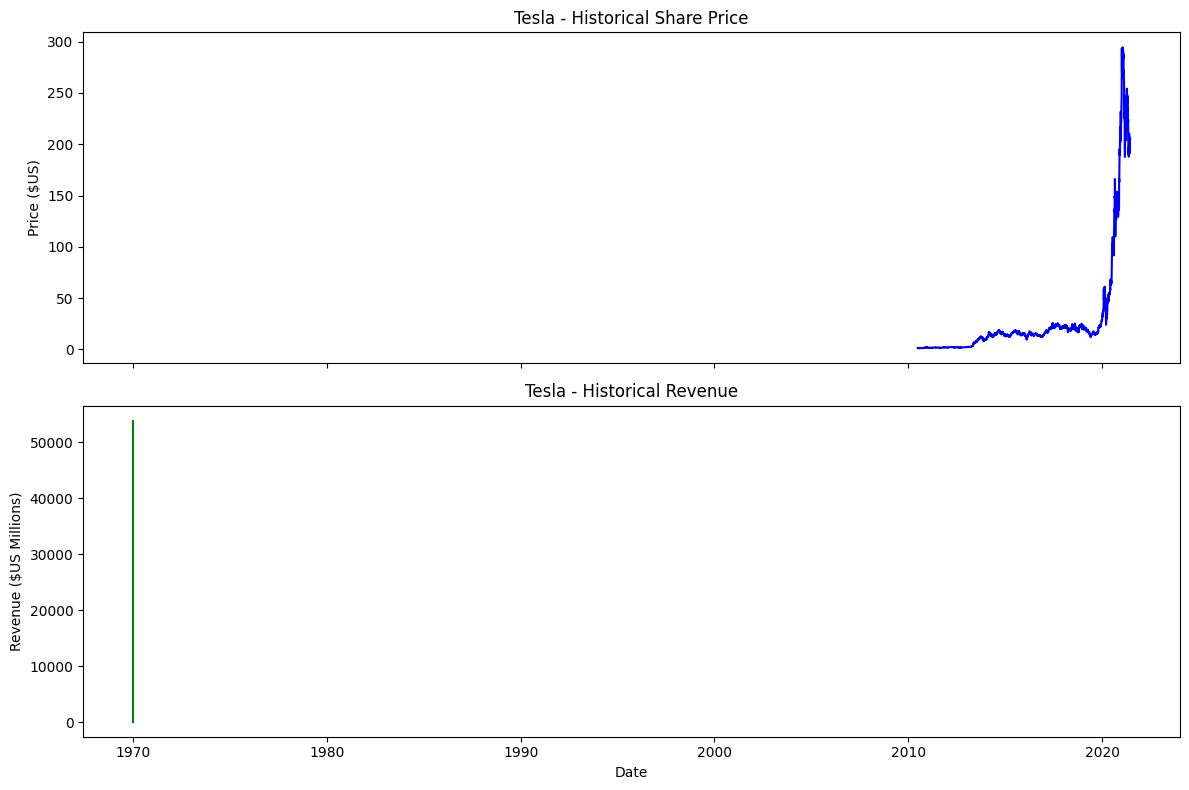

In [41]:
# Ensure tesla_data Date column is datetime
tesla_data.reset_index(inplace=True)  # in case index is date
tesla_data['Date'] = pd.to_datetime(tesla_data['Date'])

# Ensure tesla_revenue Revenue is numeric
tesla_revenue["Revenue"] = pd.to_numeric(tesla_revenue["Revenue"], errors='coerce')

# Drop rows with invalid Revenue
tesla_revenue.dropna(subset=["Revenue"], inplace=True)

# Ensure tesla_revenue Date is string or datetime
tesla_revenue['Date'] = pd.to_datetime(tesla_revenue['Date'])

# Now call the make_graph function
make_graph(tesla_data, tesla_revenue, 'Tesla')



## Question 6: Plot GameStop Stock Graph


Use the `make_graph` function to graph the GameStop Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`. Note the graph will only show data upto June 2021.


<details><summary>Hint</summary>

```

You just need to invoke the make_graph function with the required parameter to print the graphs.The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`

```
    
</details>


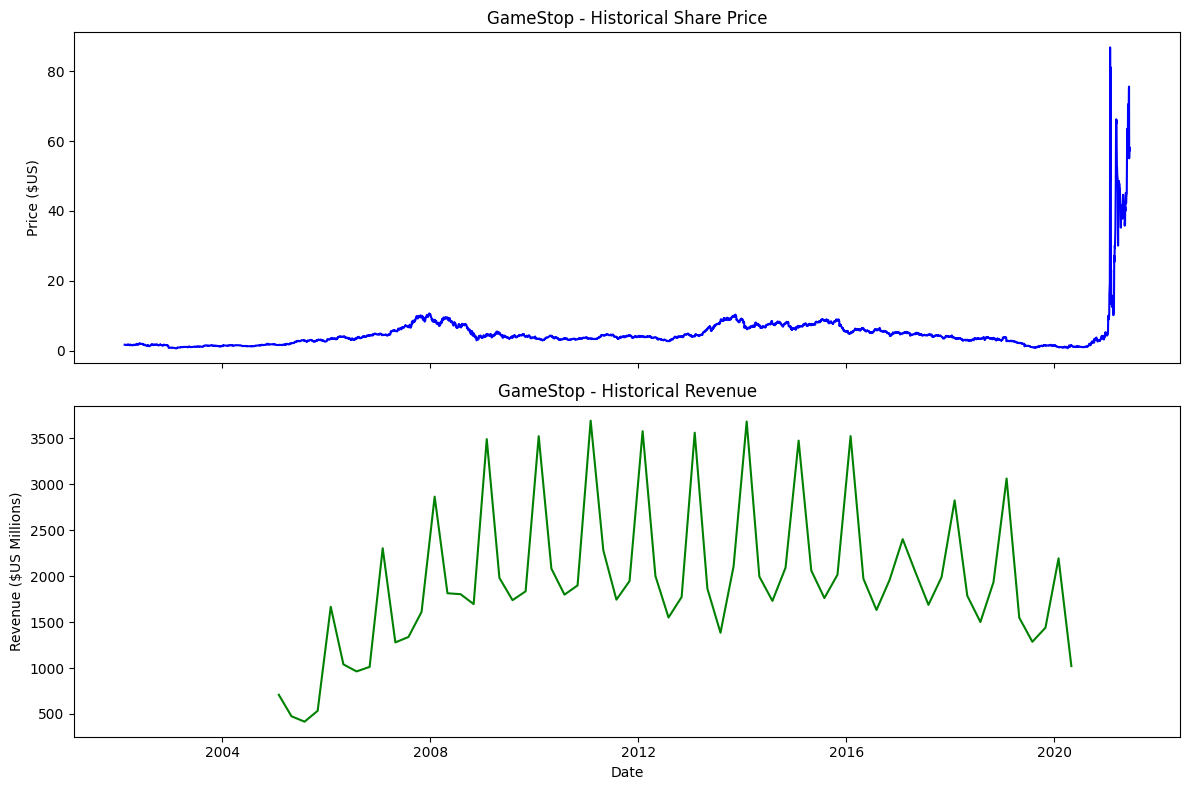

In [42]:
# Ensure gme_data Date column is datetime
gme_data.reset_index(inplace=True)  # In case Date is the index
gme_data['Date'] = pd.to_datetime(gme_data['Date'])

# Ensure gme_revenue Revenue is numeric
gme_revenue["Revenue"] = pd.to_numeric(gme_revenue["Revenue"], errors='coerce')

# Drop rows with invalid Revenue
gme_revenue.dropna(subset=["Revenue"], inplace=True)

# Ensure gme_revenue Date is datetime
gme_revenue['Date'] = pd.to_datetime(gme_revenue['Date'])

# Call the make_graph function to plot GameStop stock and revenue
make_graph(gme_data, gme_revenue, 'GameStop')


<h2>About the Authors:</h2>

<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.

Azim Hirjani


## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description        |
| ----------------- | ------- | ------------- | ------------------------- |
| 2022-02-28        | 1.2     | Lakshmi Holla | Changed the URL of GameStop |
| 2020-11-10        | 1.1     | Malika Singla | Deleted the Optional part |
| 2020-08-27        | 1.0     | Malika Singla | Added lab to GitLab       |

<hr>


Copyright © 2020 IBM Corporation. All rights reserved.
